[OK] Guardado bubble_sort_ops.png
[OK] Guardado bubble_sort_time.png
[OK] Guardado selection_sort_ops.png
[OK] Guardado selection_sort_time.png
[OK] Guardado insertion_sort_ops.png
[OK] Guardado insertion_sort_time.png


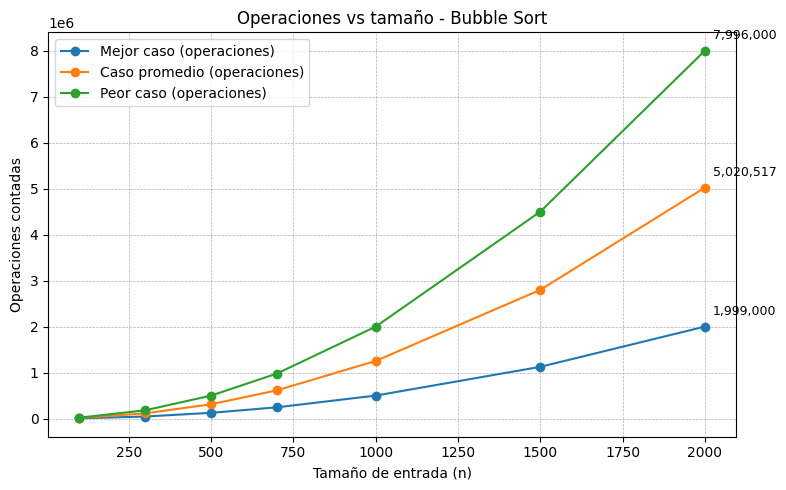

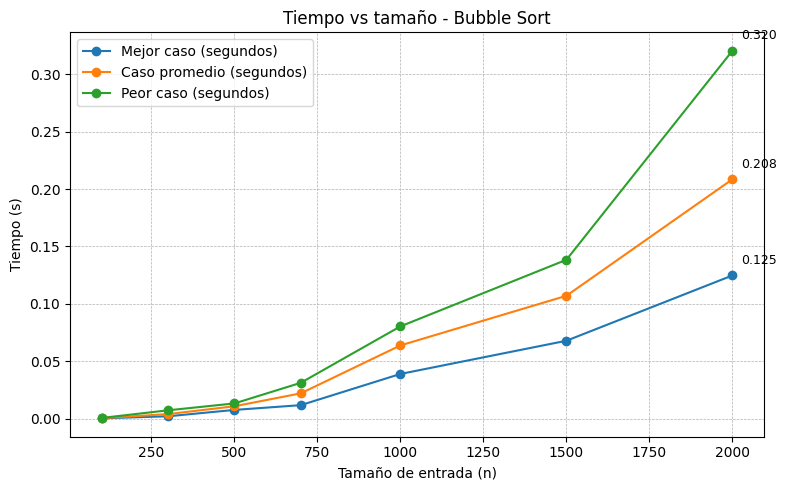

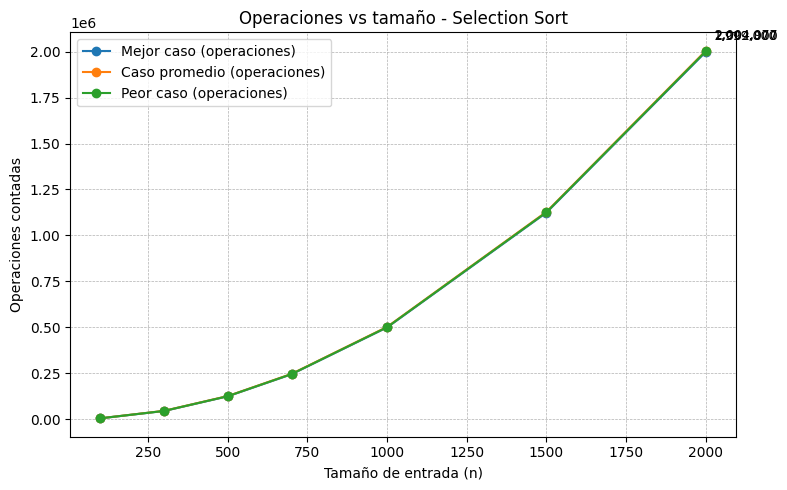

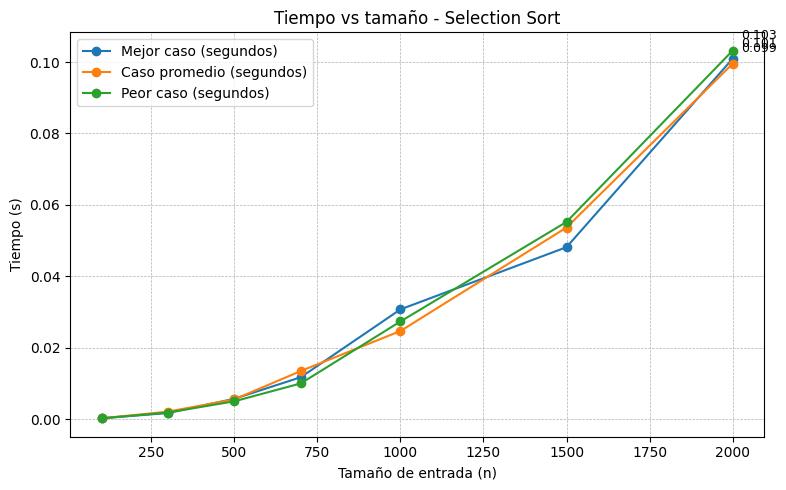

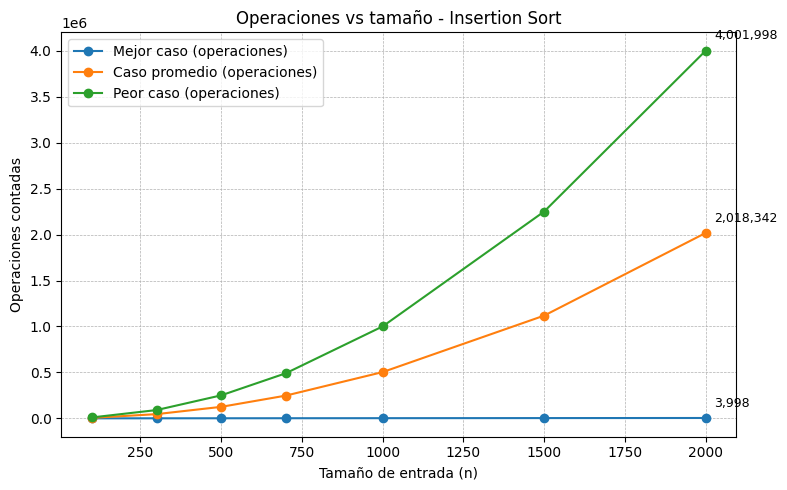

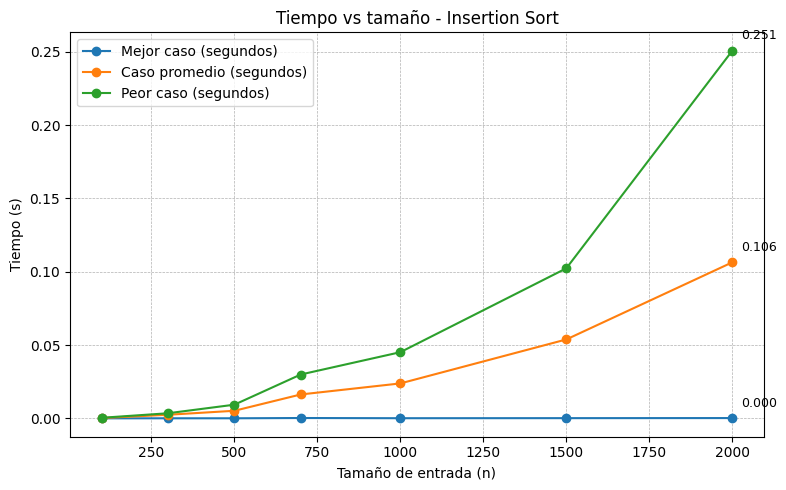

In [1]:
# graficas_sorts.py
# -*- coding: utf-8 -*-
import random
import time
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

# ------------- Configuración -------------
random.seed(42)
np.random.seed(42)

# Usa tamaños moderados para que no tarde demasiado; ajusta si lo necesitas.
SIZES = [100, 300, 500, 700, 1000, 1500, 2000]
AVG_TRIALS = 5  # repeticiones para promediar el caso promedio

# ------------- Implementaciones (conteo de operaciones similar a tu C) -------------
def bubble_sort_ops(a):
    arr = a[:]
    n = len(arr)
    ops = 0
    for i in range(n - 1):
        for j in range(n - i - 1):
            ops += 1  # comparación
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                ops += 3  # intercambio
    return ops

def selection_sort_ops(a):
    arr = a[:]
    n = len(arr)
    ops = 0
    for i in range(n - 1):
        min_idx = i
        for j in range(i + 1, n):
            ops += 1  # comparación
            if arr[j] < arr[min_idx]:
                min_idx = j
        if min_idx != i:
            arr[i], arr[min_idx] = arr[min_idx], arr[i]
            ops += 3  # intercambio
    return ops

def insertion_sort_ops(a):
    arr = a[:]
    n = len(arr)
    ops = 0
    for i in range(1, n):
        key = arr[i]
        j = i - 1
        ops += 1  # comparación inicial (como en tu C)
        while j >= 0 and arr[j] > key:
            ops += 1          # comparación verdadera (arr[j] > key)
            arr[j + 1] = arr[j]
            j -= 1
            ops += 1          # movimiento
        arr[j + 1] = key
        ops += 1              # inserción final
    return ops

def timed(fn, arr):
    """Devuelve (ops, segundos) ejecutando fn(arr)."""
    a = arr[:]
    t0 = time.perf_counter()
    ops = fn(a)
    t1 = time.perf_counter()
    return ops, (t1 - t0)

# ------------- Generadores de casos -------------
def best_case(n):
    return list(range(n))              # ya ordenado ascendente

def worst_case(n):
    return list(range(n - 1, -1, -1))  # descendente

def average_case(n):
    return np.random.randint(0, 100000, size=n).tolist()

# ------------- Recolección de métricas -------------
ALGOS = {
    "Bubble Sort": bubble_sort_ops,
    "Selection Sort": selection_sort_ops,
    "Insertion Sort": insertion_sort_ops,
}

results_ops = {name: {"best": [], "avg": [], "worst": []} for name in ALGOS}
results_time = {name: {"best": [], "avg": [], "worst": []} for name in ALGOS}

for n in SIZES:
    arr_best = best_case(n)
    arr_worst = worst_case(n)
    avg_samples = [average_case(n) for _ in range(AVG_TRIALS)]

    for name, fn in ALGOS.items():
        # Mejor
        ops_b, t_b = timed(fn, arr_best)
        results_ops[name]["best"].append(ops_b)
        results_time[name]["best"].append(t_b)

        # Peor
        ops_w, t_w = timed(fn, arr_worst)
        results_ops[name]["worst"].append(ops_w)
        results_time[name]["worst"].append(t_w)

        # Promedio (promedia varias corridas aleatorias)
        ops_list, t_list = [], []
        for sample in avg_samples:
            o, tt = timed(fn, sample)
            ops_list.append(o)
            t_list.append(tt)
        results_ops[name]["avg"].append(int(round(mean(ops_list))))
        results_time[name]["avg"].append(mean(t_list))

# ------------- Funciones de graficación (pyplot) -------------
def annotate_last_points(ax, x, y, fmt="{:,}"):
    """Coloca una etiqueta junto al último punto de la curva."""
    if not x or not y:
        return
    ax.annotate(fmt.format(y[-1]),
                xy=(x[-1], y[-1]),
                xytext=(6, 6),
                textcoords="offset points",
                fontsize=9,
                ha='left', va='bottom')

def plot_ops_for_algorithm(name):
    y_best = results_ops[name]["best"]
    y_avg  = results_ops[name]["avg"]
    y_worst= results_ops[name]["worst"]

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(SIZES, y_best,  marker='o', label='Mejor caso (operaciones)')
    ax.plot(SIZES, y_avg,   marker='o', label='Caso promedio (operaciones)')
    ax.plot(SIZES, y_worst, marker='o', label='Peor caso (operaciones)')

    ax.set_title(f"Operaciones vs tamaño - {name}")
    ax.set_xlabel("Tamaño de entrada (n)")
    ax.set_ylabel("Operaciones contadas")
    ax.grid(True, linestyle="--", linewidth=0.5)
    ax.legend(loc="upper left")

    annotate_last_points(ax, SIZES, y_best)
    annotate_last_points(ax, SIZES, y_avg)
    annotate_last_points(ax, SIZES, y_worst)

    fig.tight_layout()
    fname = f"{name.replace(' ', '_').lower()}_ops.png"
    fig.savefig(fname, dpi=150)
    print(f"[OK] Guardado {fname}")

def plot_time_for_algorithm(name):
    y_best = results_time[name]["best"]
    y_avg  = results_time[name]["avg"]
    y_worst= results_time[name]["worst"]

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(SIZES, y_best,  marker='o', label='Mejor caso (segundos)')
    ax.plot(SIZES, y_avg,   marker='o', label='Caso promedio (segundos)')
    ax.plot(SIZES, y_worst, marker='o', label='Peor caso (segundos)')

    ax.set_title(f"Tiempo vs tamaño - {name}")
    ax.set_xlabel("Tamaño de entrada (n)")
    ax.set_ylabel("Tiempo (s)")
    ax.grid(True, linestyle="--", linewidth=0.5)
    ax.legend(loc="upper left")

    annotate_last_points(ax, SIZES, y_best, fmt="{:.3f}")
    annotate_last_points(ax, SIZES, y_avg,  fmt="{:.3f}")
    annotate_last_points(ax, SIZES, y_worst,fmt="{:.3f}")

    fig.tight_layout()
    fname = f"{name.replace(' ', '_').lower()}_time.png"
    fig.savefig(fname, dpi=150)
    print(f"[OK] Guardado {fname}")

# ------------- main -------------
if __name__ == "__main__":
    for algoname in ALGOS.keys():
        plot_ops_for_algorithm(algoname)
        plot_time_for_algorithm(algoname)

    # Mostrar todo al final (puedes comentar esta línea si solo quieres guardar)
    plt.show()
